In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.models import Sequential
from random import randint

In [35]:
# setup and train test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
# making a copy before flattening for the next code segment which display images
x_train_drawing = x_train

print("X_Train:", x_train[0])
print("y_Train:", y_train[0])

X_Train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [37]:
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

In [38]:
print("After reshaping") 
print("X_Train Shape:", x_train.shape) 
print("x_test Shape:", x_test.shape)

After reshaping
X_Train Shape: (60000, 784)
x_test Shape: (10000, 784)


In [39]:
# convert class vector to binary class matrices
num_classes = 10 
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

In [40]:
print("After reshaping")
print("Y_Train Shape:", y_train.shape) 
print("y_test Shape:", y_test.shape)
print("y_Train:", y_train[0])

After reshaping
Y_Train Shape: (60000, 10)
y_test Shape: (10000, 10)
y_Train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


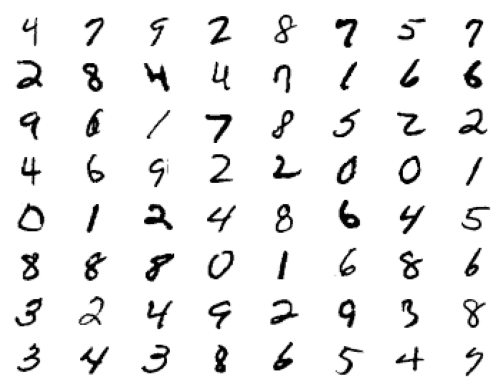

In [41]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [42]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Input(shape=(image_size,)))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4180 - loss: 1.8991 - val_accuracy: 0.8078 - val_loss: 1.0580
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7921 - loss: 1.0219 - val_accuracy: 0.8657 - val_loss: 0.7602
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8379 - loss: 0.7806 - val_accuracy: 0.8750 - val_loss: 0.6173
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.6527 - val_accuracy: 0.8912 - val_loss: 0.5290
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8685 - loss: 0.5847 - val_accuracy: 0.8982 - val_loss: 0.4762
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8776 - loss: 0.5249 - val_accuracy: 0.9053 - val_loss: 0.4363
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8837 - loss: 0.4882 - val_accuracy: 0.9073 - val_loss: 0.4048
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8894 - loss: 0.4559 - val_accu

In [44]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)

print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9248 - loss: 0.2515
Loss: 0.22176918387413025
Accuracy: 0.9348999857902527


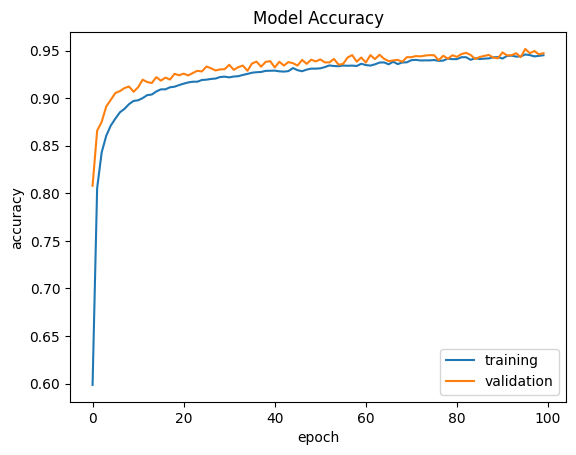

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()